In [4]:
import pandas as pd


df_train = pd.read_csv(r'data/train.csv', index_col = 'id')
df_test = pd.read_csv(r'data/test.csv', index_col = 'id')

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,90615.0,0.517098,0.118217,0.0750,0.4450,0.5450,0.6000,0.8150
Diameter,90615.0,0.401679,0.098026,0.0550,0.3450,0.4250,0.4700,0.6500
Height,90615.0,0.135464,0.038008,0.0000,0.1100,0.1400,0.1600,1.1300
Whole weight,90615.0,0.789035,0.457671,0.0020,0.4190,0.7995,1.0675,2.8255
Whole weight.1,90615.0,0.340778,0.204428,0.0010,0.1775,0.3300,0.4630,1.4880
Whole weight.2,90615.0,0.169422,0.100909,0.0005,0.0865,0.1660,0.2325,0.7600
Shell weight,90615.0,0.225898,0.130203,0.0015,0.1200,0.2250,0.3050,1.0050
Rings,90615.0,9.696794,3.176221,1.0000,8.0000,9.0000,11.0000,29.0000


In [11]:
list(df_train)==df_train.columns.to_list()

True

In [15]:
desc = pd.DataFrame(index=list(df_train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique() 
desc['%nunique'] = train.nunique() / len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc = pd.concat([desc, train.describe().T.drop('count', axis=1)], axis=1)
desc.sort_values(by=['type', 'null'])

,type,count,nunique,%nunique,null,%null,mean,std,min,25%,50%,75%,max
Rings,int64,90615,28,0.030900,0,0.0,9.696794,3.176221,1.0000,8.0000,9.0000,11.0000,29.0000
Length,float64,90615,157,0.173260,0,0.0,0.517098,0.118217,0.0750,0.4450,0.5450,0.6000,0.8150
Diameter,float64,90615,126,0.139050,0,0.0,0.401679,0.098026,0.0550,0.3450,0.4250,0.4700,0.6500
Height,float64,90615,90,0.099321,0,0.0,0.135464,0.038008,0.0000,0.1100,0.1400,0.1600,1.1300
Whole weight,float64,90615,3175,3.503835,0,0.0,0.789035,0.457671,0.0020,0.4190,0.7995,1.0675,2.8255
Whole weight.1,float64,90615,1799,1.985323,0,0.0,0.340778,0.204428,0.0010,0.1775,0.3300,0.4630,1.4880
Whole weight.2,float64,90615,979,1.080395,0,0.0,0.169422,0.100909,0.0005,0.0865,0.1660,0.2325,0.7600
Shell weight,float64,90615,1129,1.245931,0,0.0,0.225898,0.130203,0.0015,0.1200,0.2250,0.3050,1.0050
Sex,object,90615,3,0.003311,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- we only have 1 categorical column (Sex)

In [19]:
num_cols = list(train._get_numeric_data())
cat_cols = list(train.drop(num_cols, axis=1))
target='Rings'
num_cols.remove(target)
num_cols, cat_cols

(['Length',
  'Diameter',
  'Height',
  'Whole weight',
  'Whole weight.1',
  'Whole weight.2',
  'Shell weight'],
 ['Sex'])

## EDA

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Whole weight.1'}>,
        <AxesSubplot:title={'center':'Whole weight.2'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

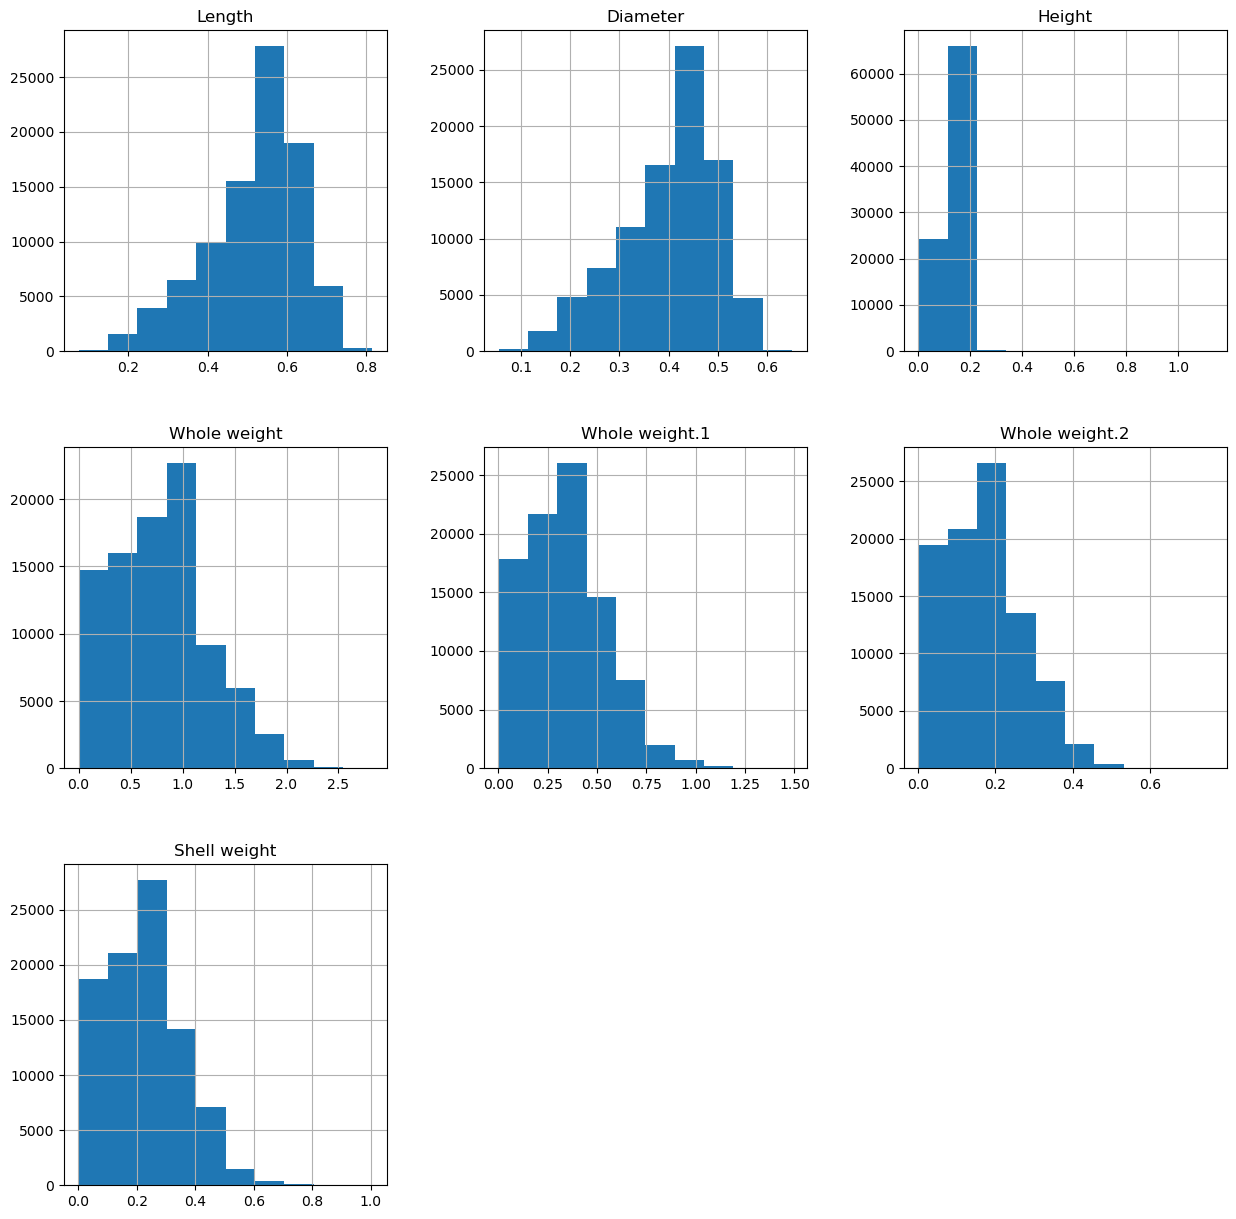

In [21]:
train[num_cols].hist(figsize=(15,15))

[Text(0, 0, '33093'), Text(0, 0, '31027'), Text(0, 0, '26495')]

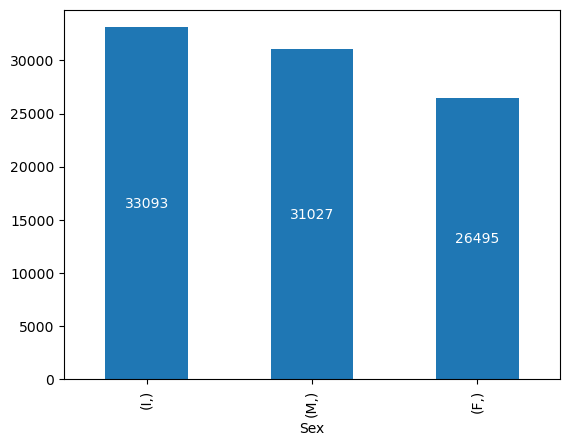

In [24]:
ax = train[cat_cols].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='center', color='white')

<AxesSubplot:xlabel='Sex'>

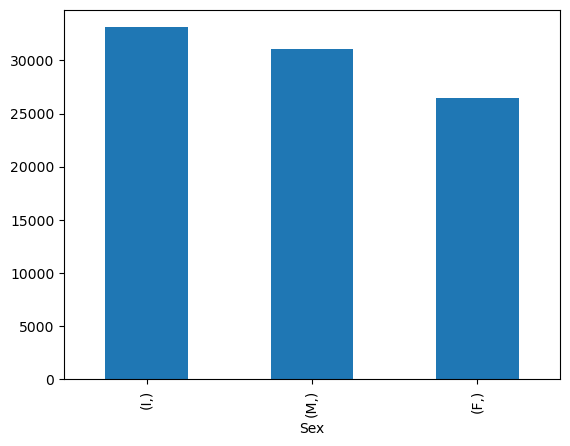

In [28]:
train[cat_cols].value_counts().plot(kind='bar')

In [29]:
train[cat_cols].value_counts()

Sex
I      33093
M      31027
F      26495
dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='Density'>

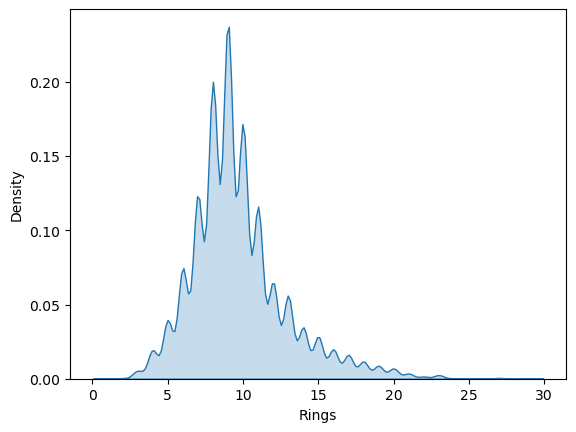

In [31]:
import seaborn as sns
sns.kdeplot(train[target], fill=True)

<AxesSubplot:>

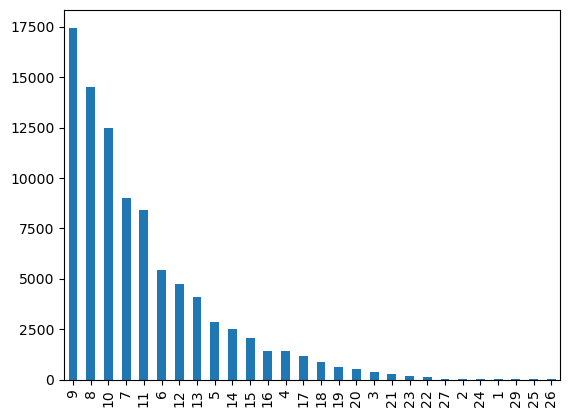

In [33]:
train[target].value_counts().plot(kind='bar')

<AxesSubplot:>

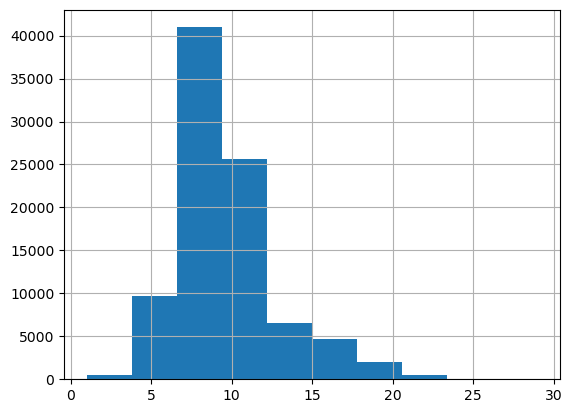

In [35]:
df_train.Rings.hist()

### Log Features

In [37]:
import scipy

# If the values are all positive and the skewness of the values is positive
log_features = [f for f in num_cols if (train[f] >= 0).all() and scipy.stats.skew(train[f]) > 0]
log_features

['Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

<AxesSubplot:>

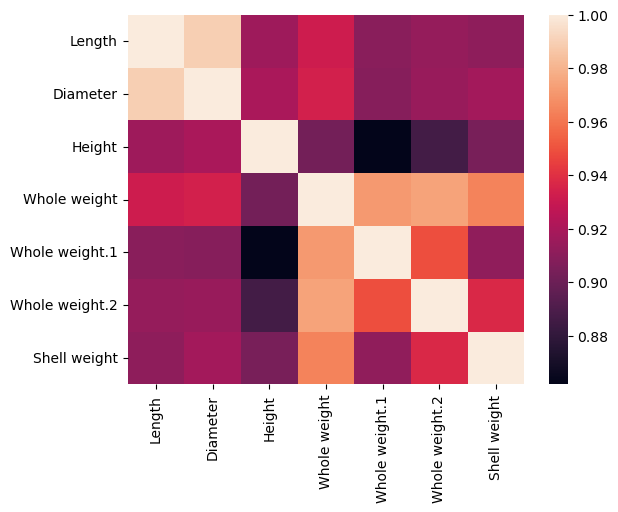

In [40]:
sns.heatmap(train[num_cols].corr())

In [43]:
import numpy as np
for col in log_features:
    train[f'log_{col}'] = np.log1p(train[col])
    test[f'log_{col}'] = np.log1p(test[col])
    
display(train.head())
display(test.head())

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,log_Height,log_Whole weight,log_Whole weight.1,log_Whole weight.2,log_Shell weight
id,,,,,,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0.139762,0.571827,0.284050,0.136714,0.215111
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,0.135405,0.756122,0.377066,0.244122,0.277632
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.024693,0.020783,0.005485,0.002996,0.004988
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.139762,0.649456,0.318817,0.186894,0.223144
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.122218,0.577736,0.314446,0.148420,0.180236


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,log_Height,log_Whole weight,log_Whole weight.1,log_Whole weight.2,log_Shell weight
id,,,,,,,,,,,,,
90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0.144100,0.805583,0.481500,0.271934,0.262749
90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0.148420,0.684611,0.391028,0.198441,0.242946
90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0.131028,0.609494,0.301955,0.169321,0.215515
90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0.135405,0.628075,0.301955,0.171008,0.211071
90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0.104360,0.306013,0.146263,0.064851,0.099845


In [46]:
num_cols = train._get_numeric_data()
num_cols

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,log_Height,log_Whole weight,log_Whole weight.1,log_Whole weight.2,log_Shell weight
id,,,,,,,,,,,,,
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0.139762,0.571827,0.284050,0.136714,0.215111
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,0.135405,0.756122,0.377066,0.244122,0.277632
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.024693,0.020783,0.005485,0.002996,0.004988
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.139762,0.649456,0.318817,0.186894,0.223144
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.122218,0.577736,0.314446,0.148420,0.180236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,0.072321,0.147126,0.066256,0.036332,0.044017
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,0.139762,0.630740,0.326783,0.166785,0.215111
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,0.090754,0.278767,0.140631,0.075571,0.078349
